In [413]:
import csv
import matplotlib.pyplot as plt

csv_file = '../data/driving_log.csv'
samples = []
with open(csv_file, 'r') as f:
    reader = csv.reader(f)
    samples = [line for line in reader]

print(len(samples))

8037


124


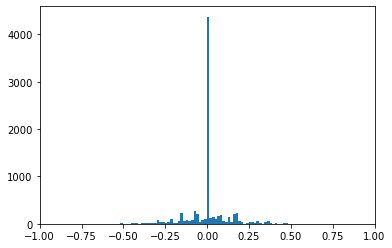

In [414]:
steering = list(map(lambda line: float(line[3]), samples[1:]))
print(len(set(steering)))
# print(steering)
plt.xlim([-1., 1.])
plt.hist(steering, bins=len(set(steering)))
plt.show()

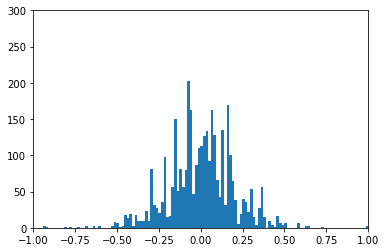

In [415]:
import random
from collections import Counter

random.shuffle(steering)
c = Counter()
filtered_steering = []
for line in steering:
    s = str(line)
    if c[s] > 100:
        continue
    c[s] += 1
    filtered_steering.append(line)

# print(c.most_common())
plt.xlim([-1.0, 1.0])
plt.ylim([0, 300])
plt.hist(filtered_steering, bins=len(set(filtered_steering)))
plt.show()

0.191
58728
0


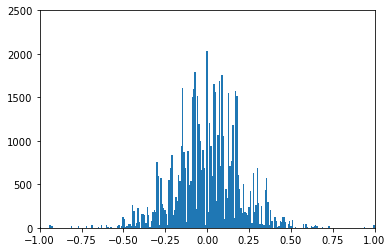

In [416]:
augmented_steering = []
count = 0 
# correction = round(random.uniform(0.2, 0.25), 3)
print(correction)
for i, s in enumerate(filtered_steering):
    correction = round(random.uniform(0.15, 0.2))
    # correction = 0.25
    steering_lr = [s, (s + correction), (s - correction)]
    augmented_steering.extend(steering_lr)
    augmented_steering.extend([-s, -(s + correction), -(s - correction)])

    if s == 0.:
        continue
    augmented_steering.extend(steering_lr)
    augmented_steering.extend(steering_lr)
    augmented_steering.extend(steering_lr)
    augmented_steering.extend(steering_lr)
    
print(len(augmented_steering))
print(count)
plt.ylim([0, 2500])
plt.xlim([-1., 1.])
plt.hist(augmented_steering, bins=len(set(augmented_steering)))
plt.show()